#**Graded Challenge 1**

Theo Jonathan

FTDS Batch 019

#Objective
Memprediksi harga perjalanan platform ride-hailing Uber dan Lyft di Boston, Massachussets

#Problem Statement
mencari tahu di jam berapa terdapat penumpang terbanyak
mencari tahu di jam berapa terdapat jarak tempuh terjauh
mencari tahu di jam berapa terdapat harga termahal

#Penjelasan Dataset
Dataset merupakan kumpulan data hasil perjalanan platform ride_hailing Uber dan Lyft di kota Boston selama bulan November dan Desember di tahun 2018. Dari data tersebut diminta untuk memprediksikan harga yang dikenakan kepada penumpang saat menggunakan aplikasi tersebut. Harga ditentukan berdasarkan jarak tempuh dari titik penjemputan penumpang hingga sampai di tujuan yang ditetapkan oleh penumpang.

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

import joblib
import json

import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.__version__

'1.2.2'

#Data Loading
Dataset yang digunakan didapat dari
https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

In [ ]:
#Loading dataset
df= pd.read_csv('/content/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
#Melihat ukuran data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
#Mengambil kolom-kolom yang diperlukan untuk dieksplorasi
df1= df[['source','destination','cab_type','name','price','distance','surge_multiplier']]
df1

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [ ]:
#Merubah nama kolom agar terlihat lebih baik
df2 = df1.rename(
    columns={"source": "Source", "destination": "Destination","cab_type": "Cab_Type","name":"Name","price": "Price","distance": "Distance","surge_multiplier":"Surge_Multiplier"}
)
df2

,Source,Destination,Cab_Type,Name,Price,Distance,Surge_Multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Source            693071 non-null  object 
 1   Destination       693071 non-null  object 
 2   Cab_Type          693071 non-null  object 
 3   Name              693071 non-null  object 
 4   Price             637976 non-null  float64
 5   Distance          693071 non-null  float64
 6   Surge_Multiplier  693071 non-null  float64
dtypes: float64(3), object(4)
memory usage: 37.0+ MB


In [ ]:
#Menentukan apa saja tipe data yang termasuk Categorical
cat_cols= list(df2.select_dtypes(include='object'))
cat_cols

['Source', 'Destination', 'Cab_Type', 'Name']

In [ ]:
#Menentukan apa saja tipe data yang termasuk Numerical
num_cols= df2.columns[df2.dtypes != 'object'].tolist()
num_cols

['Price', 'Distance', 'Surge_Multiplier']

#EDA

In [ ]:
#Melihat apakah ada data duplikasi dan mengatasinya
df2.duplicated().sum()

611394

In [ ]:
df2[df2.duplicated(keep=False)] 

,Source,Destination,Cab_Type,Name,Price,Distance,Surge_Multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693065,West End,North End,Uber,WAV,9.5,1.00,1.0
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0


In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.duplicated().sum()

0

In [ ]:
#Memeriksa ada atau tidak missing values
df2.isnull().sum()

Source                 0
Destination            0
Cab_Type               0
Name                   0
Price               1210
Distance               0
Surge_Multiplier       0
dtype: int64

In [ ]:
#Handling missing value menggunakan dropna karena tidak bisa dieksplorasi lebih lanjut tanpa mengetahui data yang sebenarnya
df3= df2.dropna()
df3.isnull().sum()

Source              0
Destination         0
Cab_Type            0
Name                0
Price               0
Distance            0
Surge_Multiplier    0
dtype: int64

In [ ]:
#Mencari rata-rata harga tiap Cab Type
df3.groupby(['Cab_Type'])[['Price']].mean().round(2)

,Price
Cab_Type,
Lyft,21.17
Uber,18.60


In [ ]:
#Mencari rata-rata jarak tempuh tiap Cab Type
df3.groupby(['Cab_Type'])[['Distance']].mean().round(2)

,Distance
Cab_Type,
Lyft,2.49
Uber,2.53


In [ ]:
#Mencari persentase masing-masing Cab Type
cab_group = df3.groupby(['Cab_Type']).size().reset_index(name='Total')
cab_group['Percentage %'] = (((cab_group.Total/df3.shape[0]) * 100).round(2))
cab_group

,Cab_Type,Total,Percentage %
0,Lyft,47821,59.43
1,Uber,32646,40.57


In [ ]:
df_new= df3[['Distance','Price','Surge_Multiplier']]
df_new

,Distance,Price,Surge_Multiplier
0,0.44,5.0,1.0
1,0.44,11.0,1.0
2,0.44,7.0,1.0
3,0.44,26.0,1.0
4,0.44,9.0,1.0
...,...,...,...
693006,7.36,36.0,1.0
693007,7.36,49.5,1.0
693008,7.36,16.0,1.0
693009,7.36,25.5,1.0


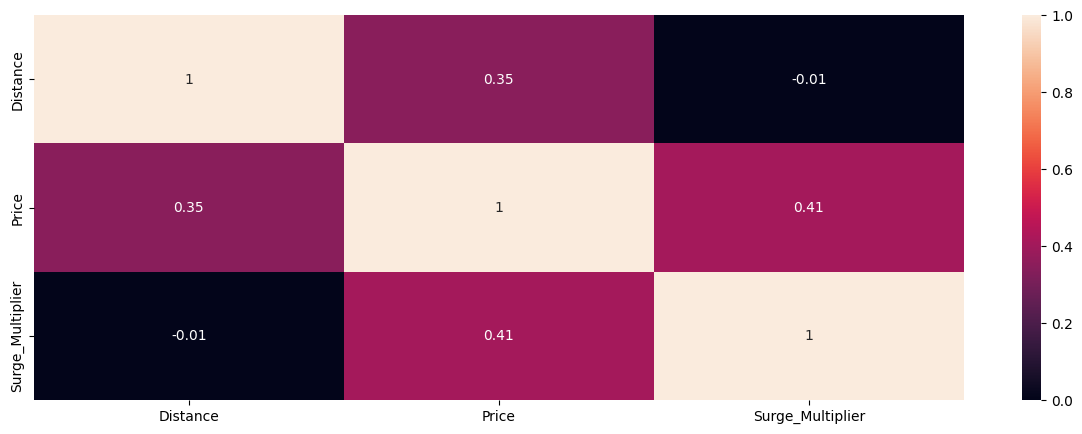

In [ ]:
#Melihat korelasi antara data distance, price, dan surge_multiplier
corr = df_new.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

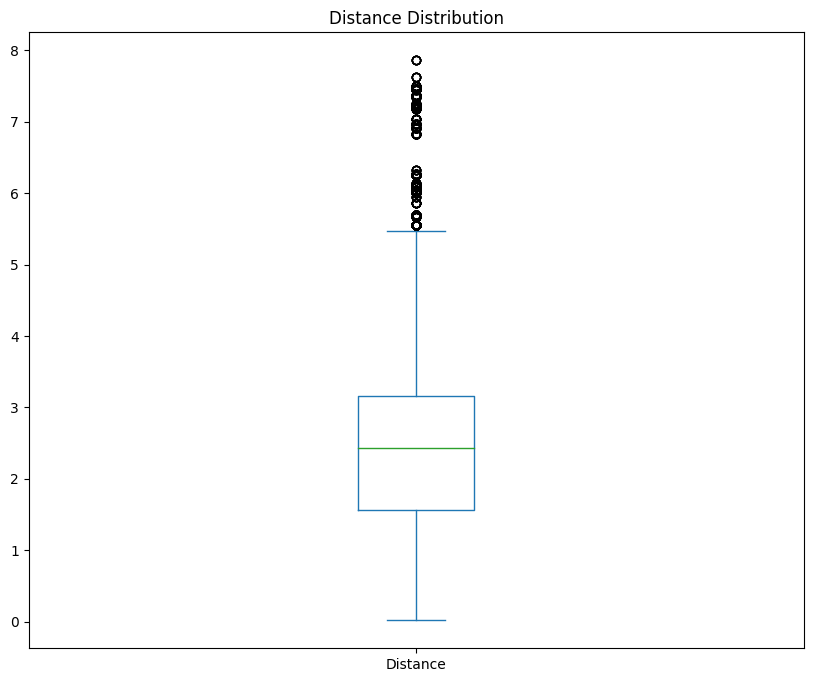

In [ ]:
#Memeriksa distribusi data Distance
df3['Distance'].plot(kind='box', title='Distance Distribution', figsize=(10,8))
plt.show() 

#Feature Engineering




In [ ]:
#Split data menjadi Fitur dan Target
X = df3[['Distance']]
y = df3['Price']

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=26)

print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (64373, 1)
test size: (16094, 1)


In [ ]:
#Menangani outlier pada data distance
def diagnostic_plots(df3, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df3[variable], bins=20)
    plt.title('Histogram')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df3[variable])
    plt.title('Boxplot')

    plt.show()

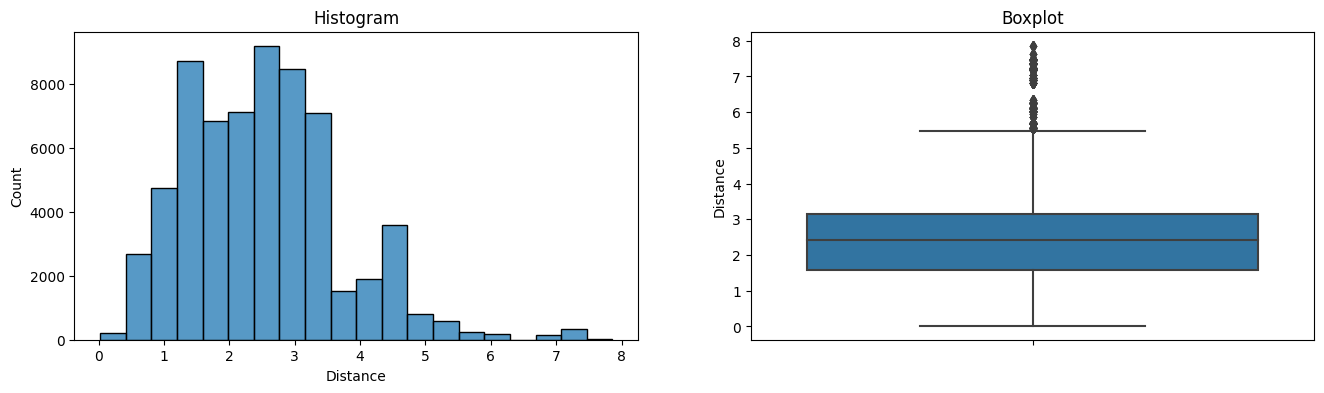


Skewness Value :  0.8250103620475342


In [ ]:
diagnostic_plots(X_train, 'Distance')
print('\nSkewness Value : ', X_train['Distance'].skew())

In [ ]:
def find_normal_boundaries(df3, var):
    upper_boundary = df3[var].mean() + 3 * df3[var].std()
    lower_boundary = df3[var].mean() - 3 * df3[var].std()

    return upper_boundary, lower_boundary

In [ ]:
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'Distance')
upper_boundary, lower_boundary

(6.050137385286629, -1.0301414242470623)

In [ ]:
def percentage_outlier(df3, var):
  
  outlier_right_tail=(len(df3[df3[var] > upper_boundary]) / len(df3) * 100)
  outlier_left_tail= (len(df3[df3[var] < lower_boundary]) / len(df3) * 100)
  return outlier_right_tail, outlier_left_tail

In [ ]:
print(f"% right end outliers : {percentage_outlier(X_train,'Distance')[0]}")
print(f"% left end outliers  : {percentage_outlier(X_train,'Distance')[1]}")

% right end outliers : 1.0423624811644632
% left end outliers  : 0.0


In [ ]:
index_outlier= X_train.query('Distance > @upper_boundary').index.tolist()
index_outlier

[110367,
 87443,
 429516,
 31263,
 413627,
 294214,
 615966,
 57510,
 295710,
 301775,
 595360,
 41571,
 233611,
 164404,
 129020,
 517930,
 276608,
 162873,
 29016,
 227027,
 56929,
 553937,
 78532,
 422991,
 264125,
 16838,
 6068,
 658725,
 30117,
 658724,
 111096,
 280173,
 685079,
 682619,
 513925,
 207103,
 111097,
 660051,
 513088,
 585581,
 78538,
 433010,
 83483,
 370218,
 27721,
 62714,
 365685,
 2220,
 28560,
 316839,
 13623,
 287302,
 342064,
 674237,
 49734,
 299081,
 305897,
 199196,
 101282,
 171049,
 2215,
 18021,
 78631,
 16837,
 305902,
 89615,
 87012,
 640775,
 12273,
 597125,
 553933,
 140059,
 162869,
 21685,
 242745,
 224566,
 625227,
 57508,
 31265,
 247250,
 56933,
 83480,
 62715,
 31262,
 682617,
 18678,
 39834,
 280177,
 492727,
 227022,
 222790,
 393496,
 62716,
 111099,
 39471,
 72862,
 615965,
 60382,
 122559,
 29018,
 30134,
 213775,
 427028,
 432178,
 99313,
 83484,
 144435,
 101276,
 49732,
 99896,
 353137,
 462435,
 89620,
 227021,
 128118,
 462439,
 173

In [ ]:
y_train.loc[index_outlier]

110367    53.5
87443     18.5
429516    59.5
31263     15.5
413627    32.5
          ... 
553932    22.0
598564    26.5
242744    16.0
634998    21.5
34154     18.0
Name: Price, Length: 671, dtype: float64

In [ ]:
X_train_no_outlier = X_train[
    ~((X_train['Distance'] > upper_boundary) | (X_train['Distance'] < lower_boundary))]

In [ ]:
#dengan outlier
X_train.shape[0]

64373

In [ ]:
#tanpa outlier
X_train_no_outlier.shape[0] 

63702

In [ ]:
#sesuaikan dengan y_train agar jumlah rownya sama
y_train_drop= y_train.drop(index_outlier, axis=0)
y_train_drop.shape[0]

63702

In [310]:
#variable baru untuk encoding
X_train_new= X_train_no_outlier.copy()
X_test_new= X_test.copy()

In [317]:
enc_ = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_ohe = enc_.fit_transform(X_train_new[['Distance']])
X_test_ohe = enc_.transform(X_test_new[['Distance']])

X_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [318]:
X_train_ohe.shape

(63702, 525)

In [319]:
X_test_ohe.shape

(16094, 525)

In [320]:
X_train_new.reset_index(drop=True, inplace=True)
X_test_new.reset_index(drop=True, inplace=True)

#Model Definition

In [323]:
from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression()

#Model Training


In [ ]:
mod =model.fit(x_scaled,y_train)

In [ ]:
y_pred_train = mod.predict(x_scaled)
y_pred_test = mod.predict(x_scaled_test)

#Model Evaluation


In [ ]:
np.mean(y_train)

20.131615428828855

In [ ]:
np.mean(y_test)

20.107213868522432

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

-------- TRAIN ---------
MAE train =  8.77316474119984
MAE test =  8.875992255471282
MSE train =  123.01748995368894
MSE test =  126.23717251507945
RMSE train =  11.091324986388639
RMSE test =  11.235531697035055


#Model Saving


In [355]:
with open('model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(model_lin_reg, file_1)

with open('list_num_cols.txt', 'w') as file_5:
  json.dump(num_features, file_5)

#Model Inference


In [356]:
with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg= joblib.load(file_1)

with open('list_num_cols.txt', 'r') as file_5:
  num_cols= json.load(file_5)

#Kesimpulan
Dari dataset diatas dan hasil analisis yang dilakukan adalah bahwa penentuan harga ride-hailing Uber dan Lyft sangat berpengaruh dengan jarak tempuh. Semakin jauh jarak tempuhnya, semakin tinggi harga yang dikenakan kepada penumpang.